# Assignment2 : VM Deployment for Image Recognition


##  Description
  
  The goal of assignment2 is to learn how to deploy and run an application on a Virtual Machine (VM). Why not containers? Containers are lightweight, efficient, and fast to start, making them ideal for running microservices and other distributed applications. However, there are situations where it makes sense to move from containers to virtual machines. One reason is when you need stronger security and isolation between different applications or services. Virtual machines offer hardware-level isolation, which makes it harder for attackers to access sensitive data or applications. Another reason to use virtual machines is when you need to run legacy applications or those that require specific versions of operating systems (like MS Windows). In this case, virtual machines can provide a consistent environment for running these applications without having to worry about compatibility issues. 
  
  In this assignment, you will work with a convolutional neural network (CNN) for image recognition that has complex dependencies and utilizes a large dataset. In the first step, you will attempt to run the application on your local host. A CNN model typically requires a large amount of data and computational power for training, making it difficult for many users to run them on their local machines. In the next step, you will explore how to deploy and run the same application on a virtual machine on a cloud platforms, gaining insights into the differences between running it on a VM versus a local host.

## A. Run and test an image recognition program on your local machine


For simplicity, a python script has been provided for you in this assignment. Here's a sample code for a convolutional neural network (CNN) for image recognition. This code trains a CNN on the CIFAR-100 dataset, which contains 50,000 training images. We repeat each image 10 times to increase the dataset size, resulting in a total of 500,000 training images. This larger dataset will require more memory for training.


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


/opt/miniconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.3458 - loss: 1.7636 - val_accuracy: 0.5350 - val_loss: 1.2950
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.5584 - loss: 1.2399 - val_accuracy: 0.6073 - val_loss: 1.1235
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6231 - loss: 1.0672 - val_accuracy: 0.6197 - val_loss: 1.0800
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6605 - loss: 0.9633 - val_accuracy: 0.6551 - val_loss: 0.9830
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6863 - loss: 0.8887 - val_accuracy: 0.6619 - val_loss: 0.9684
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7077 - loss: 0.8353 - val_accuracy: 0.6909 - val_loss: 0.8849
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.7265 - loss: 0.7757 - val_accuracy: 0.6825 - val_loss: 0.9151
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.7381 -

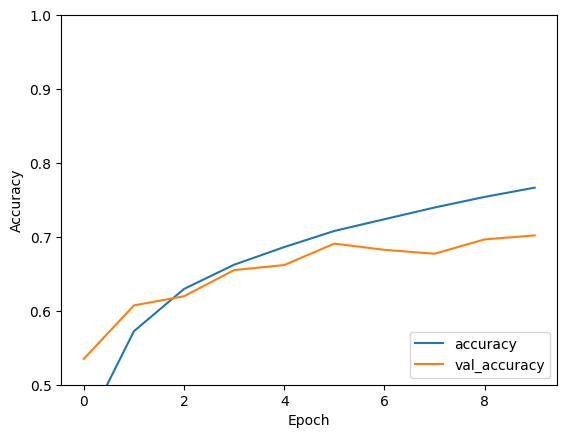

In [2]:
# image-recognition.py

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

### 1- Set up the environment and dependencies

- Install the required dependencies for the image recognition program, such as tensorflow and matplotlib.
- Set up the environment variables if required.


### 2- Run the program on a local host

- Open the terminal and navigate to the directory where the image classification program is stored.
- Run the program on your local host. 
- Verify the output generated by the program.


### 3- Analyze the result

 Answer the following questions:

     A) How long did the execution (training and testing procedures) take?

     B) Did you face any issues running this program on your local machine?
 

 ##  B. Deploying the Program on a Virtual Machine
 
When running this code on a local machine with limited resources, you might observe that the code runs into memory issues and may even crash due to insufficient memory to handle the increased dataset size. On the other hand, running the same code on cloud-based virtual machine, which provides more generous resource allocations, may allow the code to execute successfully without running out of memory. In the next step, you will deploy and test the application on a virtual machine. To do so, you need to walk through the following steps:

 
### 1- Containerize the application

NAME YOUR DOCKER INSTANCE: image-recognition
 
Containerize the application in the same format that you would have if you were deploying to play with docker in the previous assignment.

In the previous assignment, you gained an understanding of the benefits of containerizing a complex application, which not only provides more flexibility and control over the infrastructure, but also makes the application portable. To streamline the process of transferring the application to a virtual machine, you first need to containerize the application. Once the Docker image is created, it can be conveniently deployed on a virtual machine.

 
 ### 2- Provision a virtual machine

 You need to provision a virtual machine with a supported operating system and Docker installed. This can be done on cloud platforms like AWS, Azure, or GCP. This step may be slightly different depending on the cloud platform that you work with. In the following, you will learn how to provision a VM on AWS.
 
   
  - Sign in your AWS account.

  - In the top right click on your current zone select Canada Central. 

  - Create an Amazon Machine Image (AMI): For this code, you can use the Deep Learning AMI provided by AWS, which includes popular deep learning frameworks such as TensorFlow, PyTorch, and MXNet. <b>If available try: Deep Learning OSS Nvidia Driver AMI GPU TensorFlow 2.13.</b>

  - Please be mindful of the security group rules. You may not want inbound traffic from the whole world! How would you set up the rules to protect your EC2?

  - Choose an instance type: t2.xlarge.

  - Create Key Pair Login. Choose RSA and PEM options. Once created it will automatically download into your browser. Save it in your active coding directory for later use. Don't put it in the same folder as your dockerfile.

  - Launch your EC2 instance

In [ ]:
#Go to the directory where your keypair is located and run the command. This allows you to utilize your keypair to connect to the instance.
chmod 400 "yourKeyPairLogin.pem"

 ### 3-Deploy the application on VM


 - Click on the dropdown "Actions" (top right corner). Then click on "Connect"
 - You will be transported to a new screen. Click on the tab " Client"
 - At the bottom of the panel their will be an "Example". <b>Copy your example</b>. It should be similar to:

In [ ]:
# DO NOT USE THIS ONE. 
# THERE IS AN EXAMPLE ON THE PAGE THAT AWS HAS PROVIDED
ssh -i "yourKeyPairLogin.pem" ec2-user@ec2-89-182-37-39.ca-central-1.compute.amazonaws.com

- Ensure that your url (ec2-user@...) starts with 'ec2-user'. If it starts with 'root', replace it with 'ec2-user' 

- In your terminal, navigate to the directory that "yourKeyPairLogin.pem" is saved.

- Paste your command (ssh -i ...) in your terminal and run it 

- Once you are connected, exit out of the SSH session. You will need to SSH into your VM later. 

#### Having Connection Issues?
If you are having problems ensure that your public dns starts with "ec2-user" and not "root"
- WRONG (eg. root@ec2-89-182-37-39.ca-central-1.compute.amazonaws.com)
- RIGHT (eg. ec2-user@ec2-89-182-37-39.ca-central-1.compute.amazonaws.com)

If you are having other authentication issues try:
- aws configure (then put in your passwords)
- aws configure set aws_session_token "your session token without quotes"

### 3.1-Upload Docker File to VM

 
 
 Transfer the Docker image to the virtual machine using a secure copy tool like SCP or SFTP. You can use the following command to save the Docker image as a tar file and transfer it to the virtual machine into the /tmp directory on the VM.

 This might take 2 minutes to upload

 <b>MODIFY THE COMMAND BELOW</b>
 - replace ec2-user@12-34-46.ca-central-1.compute.amazonaws.com:/tmp/ with your info 
 - replace yourKeyPairLogin.pem

#### Issues Uploading?
- Ensure you are in the same folder as your .pem key

### 4- Run and test the application on VM

To run a Docker image on a VM, you can follow these steps:

- SSH into your VM like in step 3 (ssh -i ...)

- Once you have SSH'ed into your VM make sure that Docker is installed on the VM. You can check this by running the following command:

If Docker is not installed, you will need to install it before proceeding.


- Load the Docker image into Docker by running the following command (change your file path based on the location of your file):

This will load the Docker image into Docker on the VM.

- Run the Docker container by running the following command:

This will start a new Docker container based on the image you loaded.

- Test the application on the VM
- Record the execution result


### 5- Analyze the result

Answer the following questions:

 A) How long did the execution (training and testing procedures) take?

 B) Did you face any issues running this program on you local machine?
 
 C) How running the application on VM differs from local host?

## Deliverables:

-1 A  Dockerfile and a docker image of the image classification application.
-2 An output file containing the execution result of running your image classification program on local host.
-3  An output file containing the execution result of running your image classification program on EC2 instance.
-4 A PDF report detailing the advantages and disadvantages of running a heavy application on a local host and a VM. You have to compare both cases from performance perspective. This also includes answering the questions in "3-Analysis the result and 5-Analyze the result". This report should include the link to the first three outputs as well.
-5 A mp3 recording detailing the steps 1-5.

- Please delete your EC2 instances after you are complete - costs add up quickly with them.



# Good luck!